In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib.ticker import FuncFormatter

In [2]:
labelsize = 15

In [3]:
def scientific_tex_formatter(x, pos):
    if x == 0.:
        return r'$0$'
    
    str_ = "%.1e" % x
    
    #str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-', '\,\,10^{-')
    str_ = str_.replace('e+', '\,\,10^{')
    
    if str_[-2] == '0':
        str_ = str_[:-2] + str_[(-1):]
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter = FuncFormatter(scientific_tex_formatter)

def scientific_tex_formatter2(x, pos):
    if x == 1.:
        return r'$1$'
    
    str_ = "%.1e" % x
    
    str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-0', '\,\,10^{-')
    str_ = str_.replace('e+0', '\,\,10^{')
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter2 = FuncFormatter(scientific_tex_formatter2)

In [4]:
def tex_foramtter(x, pos):
    return r'$\rm{%s}$' % x

f_tex_foramtter = FuncFormatter(tex_foramtter)

def tex_transf(x):
    return r'$\rm{%s}$' % x

In [5]:
def tex_pct_formatter(x, pos):
    return r'$%.0f \%%$' % x

f_tex_pct_formatter = FuncFormatter(tex_pct_formatter)

In [6]:
import pandas as pd
import numpy as np

import os

In [7]:
dir_tr_input_ = './transformed_input'

udls = pd.read_csv(os.path.join(dir_tr_input_,'UDL.csv'), header=0, index_col=0)
udls.head()

,Nu,Coef,UDL value
UDL,,,
AAI,3.133782,0.020107,29.66
AEX,3.345641,0.013696,443.83
AF,4.551459,0.029619,8.62
AGN,2.656825,0.023799,5.08
AH,2.705614,0.015807,20.60


In [8]:
NB_OF_DAYS_PER_YEAR = 250
annual_coeff = np.sqrt(NB_OF_DAYS_PER_YEAR / 3.)

In [9]:
udls[r'$\sigma$'] = (udls['Nu'] / (udls['Nu'] - 2.)).apply(np.sqrt) * udls['Coef'] * annual_coeff * 100

In [10]:
udls.head()

,Nu,Coef,UDL value,$\sigma$
UDL,,,,
AAI,3.133782,0.020107,29.66,30.516095
AEX,3.345641,0.013696,443.83,19.714404
AF,4.551459,0.029619,8.62,36.112742
AGN,2.656825,0.023799,5.08,43.694099
AH,2.705614,0.015807,20.60,28.256318


# Volatilities

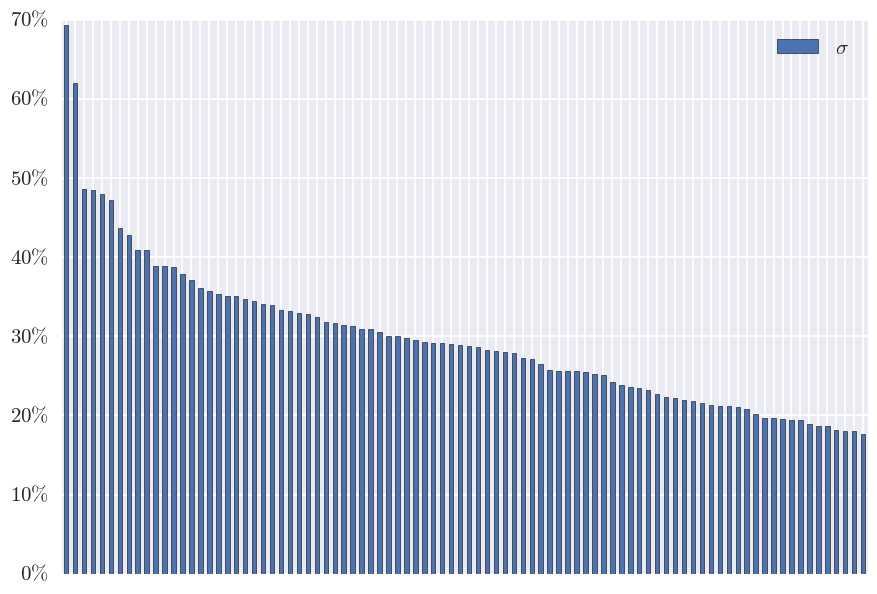

In [11]:
f, ax = plt.subplots()

udls.sort_values(r'$\sigma$')[::-1][r'$\sigma$'].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

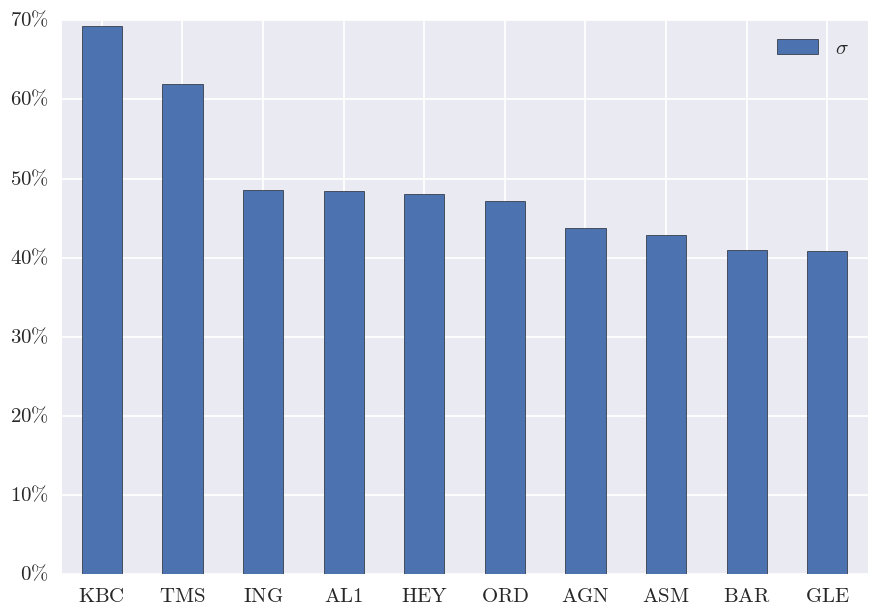

In [12]:
f, ax = plt.subplots()

udls.sort_values(r'$\sigma$')[::-1][r'$\sigma$'][:10].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

# Risks

In [13]:
filtered_nb = 10

In [14]:
members_pos = pd.read_csv(os.path.join(dir_tr_input_, 'positions.csv'), header=0, index_col=0)
abs_positions = members_pos.abs()

In [15]:
instant_vol = udls[r'$\sigma$'] / (100. * annual_coeff)
udl_risk = instant_vol.multiply(udls['UDL value'])

members_risk = abs_positions.multiply(udl_risk)

In [16]:
gross_positions = abs_positions.dot(udls['UDL value'])
highest_cm_index = gross_positions.sort_values()[::-1][:filtered_nb].index

highest_cm_index

Index([u'PB7', u'PB56', u'PB50', u'PB59', u'PB32', u'PB15', u'PB45', u'PB65',
       u'PB34', u'PB41'],
      dtype='object')

In [17]:
highest_member_risks = members_risk.ix[highest_cm_index.tolist()]

highest_member_risks[highest_member_risks == 0.] = 1.

In [18]:
highest_member_risks.head()

,AAI,AEX,AF,AGN,AH,AHA,AI,AKZ,AL1,ASL,...,UCB,UG,UL,UMC,UN,VIE,VK,VPK,WHV,WKL
PB7,1.000000,2.067516e+07,519.313649,261.059710,5590.736258,10350.080550,241999.756849,1008.017085,1.0,41093.723930,...,283.441941,16954.507371,370.324519,91242.973832,984.794011,642.218087,47368.544243,1.00000,1.000000,1.00000
PB56,1.000000,1.014856e+06,425736.620215,72659.320791,43880.389960,17898.505502,24117.265267,19302.357914,1.0,382077.453803,...,753.981096,292376.215330,108555.289858,19470.291977,345457.832074,101652.213083,15529.037885,356.14589,1.000000,10031.12862
PB50,1.000000,1.011890e+07,1.000000,1.000000,1.000000,1.000000,62185.331785,50480.376733,1.0,3059.124457,...,9785.516982,752.223067,152171.941704,142588.156005,210381.830573,1.000000,1.000000,1.00000,1.000000,1.00000
PB59,1.000000,6.310747e+06,1.000000,4682.127120,2961.172843,1.000000,17785.073775,59746.039543,1.0,30777.510513,...,74885.637674,248371.948449,37312.006701,46543.252911,9325.325280,1.000000,1.000000,1.00000,1.000000,1.00000
PB32,1286.564515,1.230022e+06,50127.458414,5940.699230,1356.661697,1492.682439,18145.686185,1.000000,1.0,1607.659679,...,6701.658596,417.022762,1.000000,1130.069302,41975.968412,1527.401431,7957.980144,1.00000,1244.658856,1.00000


In [19]:
udl_ordered_index = highest_member_risks.sum(axis=0).sort_values()[::-1].index

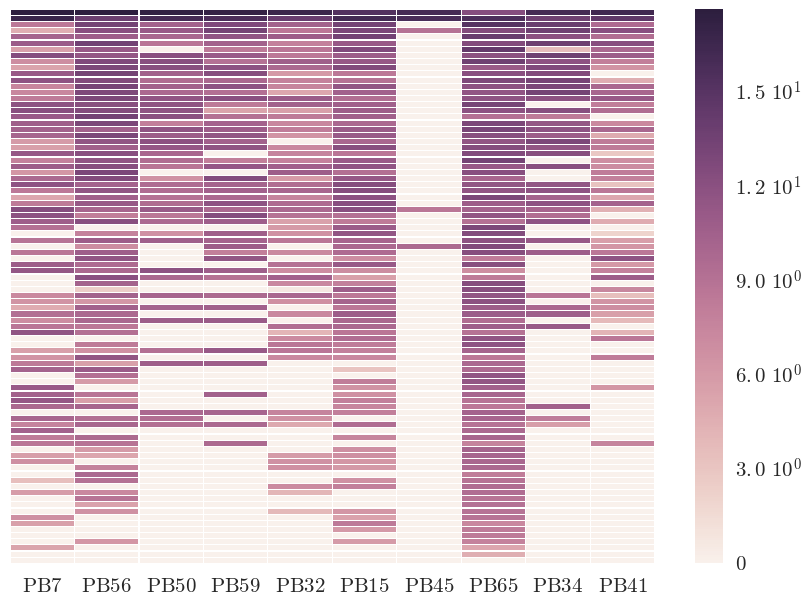

In [20]:
f, ax = plt.subplots()

sns.heatmap(highest_member_risks.T.apply(np.log).ix[udl_ordered_index.tolist()], 
            ax=ax, 
            linewidths=.1, 
            cbar_kws={'format': f_scientific_tex_formatter})

x_labels = [tex_transf(lab) for lab in highest_member_risks.index.tolist()]
ax.set_xticklabels(x_labels)

y_labels = ['' for lab in members_risk.columns]
ax.set_yticklabels(y_labels)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()

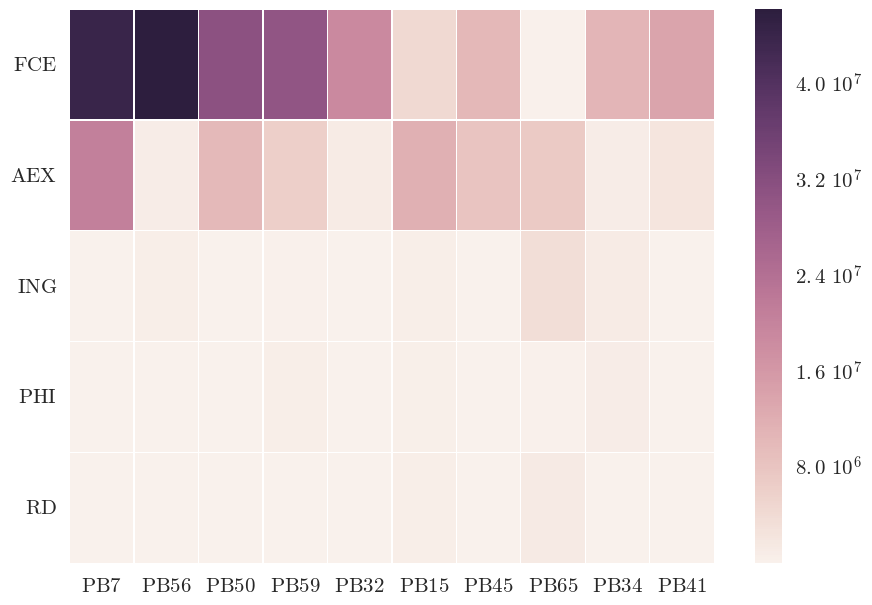

In [21]:
f, ax = plt.subplots()

to_plot = highest_member_risks.T.ix[udl_ordered_index.tolist()].ix[:5]

sns.heatmap(to_plot, 
            ax=ax, 
            linewidths=.1, 
            cbar_kws={'format': f_scientific_tex_formatter})

x_labels = [tex_transf(lab) for lab in to_plot.columns]
ax.set_xticklabels(x_labels)

y_labels = [tex_transf(lab) for lab in to_plot.index.tolist()]
ax.set_yticklabels(y_labels[::-1])

for label in ax.get_yticklabels():
    label.set_rotation(0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()